### Notebook Overview
- **Load & Inspect Data**: Display the first few rows of each dataset to give a preview.
- **Missing Values Check**: Identify missing values in each column.
- **Category and Subcategory Analysis**: Count and visualize the distribution of scam types.
- **Reporting Sources**: Display the sources reporting the scams to check for diversity in data sources.
- **Address Analysis**: Analyze the number of associated addresses by category, providing insight into the scale of scam operations.
- **Word Cloud for Descriptions**: Generate a word cloud to show common terms in scam descriptions, giving a quick visual insight into common scam strategies.
- **Summary Statistics**: Show descriptive statistics for address count, revealing the spread of data.

This EDA notebook offers a clear overview and helps users understand the structure and distribution of scam types in the dataset.

URIs Dataset:


,name,url,category,subcategory,description,addresses,reporter
0,twitter.com/cz_binance,https://twitter.com/cz_binance,Scamming,Trust-Trading,Trust trading 0.5ETH for 5ETH,{'ETH': ['0x08389B19ad52f0d983609ab785b3a43A0E...,CryptoScamDB
1,Twitter: EthereumWallets,https://twitter.com/EthereumWallets,Phishing,MyEtherWallet,https://bitcointalk.org/index.php?topic=168958...,NaN,CryptoScamDB
2,twitter.com/VltalkButerin,https://twitter.com/VltalkButerin,Scamming,Trust-Trading,Trust trading 0.1ETH for 2ETH,{'ETH': ['0x7bb386c33486fe345168d0af94bef03897...,CryptoScamDB
3,twitter.com/Aurora__dao/status/960683836463075328,https://twitter.com/Aurora__dao/status/9606838...,Scamming,Trust-Trading,Trust trading scam tweet,{'ETH': ['0xfa2e4bddb3899dFB0d91A70744739d9f76...,CryptoScamDB
4,twitter.com/VitalikButeriin,http://twitter.com/VitalikButeriin,Scamming,Trust-Trading,Trust trading 0.1ETH for 2ETH,{'ETH': ['0x5d82db63cf0c54d47006d416bdc7dab09e...,CryptoScamDB


URLs Dataset:


,name,url,category,subcategory,description,addresses,reporter
0,xn--myetherwallt-leb.com,http://xn--myetherwallt-leb.com,Phishing,MyEtherWallet,Google reports site as insecure,NaN,CryptoScamDB
1,myelherwallel.com,http://myelherwallel.com,Phishing,MyEtherWallet,NaN,{'ETH': ['0xD0cC2B24980CBCCA47EF755Da88B220a82...,CryptoScamDB
2,myetherwallet.cam,http://myetherwallet.cam,Phishing,MyEtherWallet,redirecting to real site but that happened before,NaN,CryptoScamDB
3,coindash.ru,http://coindash.ru,Phishing,Coindash,someone plz check,NaN,CryptoScamDB
4,coin-wallet.info,http://coin-wallet.info,Phishing,Coindash,scam wallet,NaN,CryptoScamDB



Missing Values:


name              0
url               0
category          0
subcategory      13
description    1878
addresses      5559
reporter          3
dtype: int64


Unique Categories of Scams:
category
Phishing    5947
Scamming    3890
Malware       67
Fake ICO       1
Hacked         1
Name: count, dtype: int64


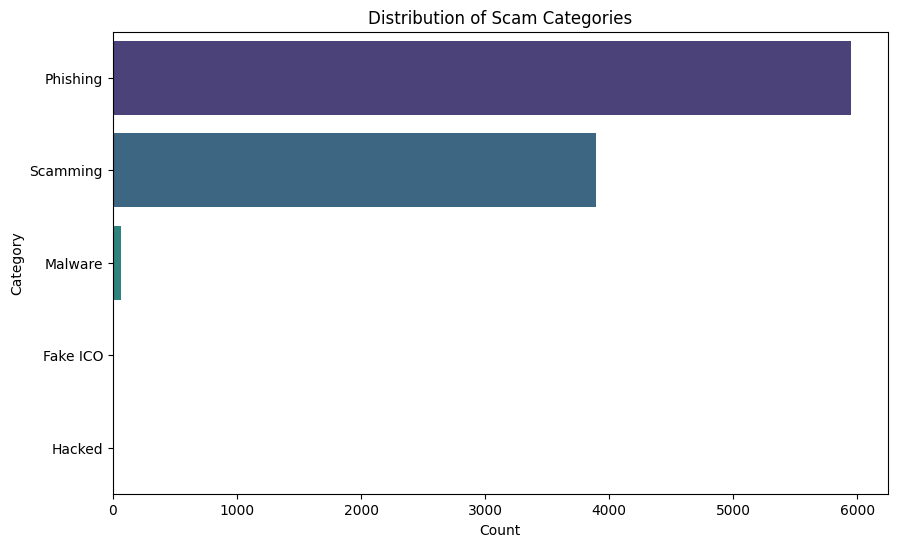


Unique Subcategories of Scams:
subcategory
Trust-Trading       3413
MyEtherWallet       2834
Exchange             297
MetaMask             187
Idex                 163
                    ... 
Mercatox               1
Digitexfutures         1
LocalEtherWallet       1
Gifto                  1
OnChainMonkey          1
Name: count, Length: 525, dtype: int64


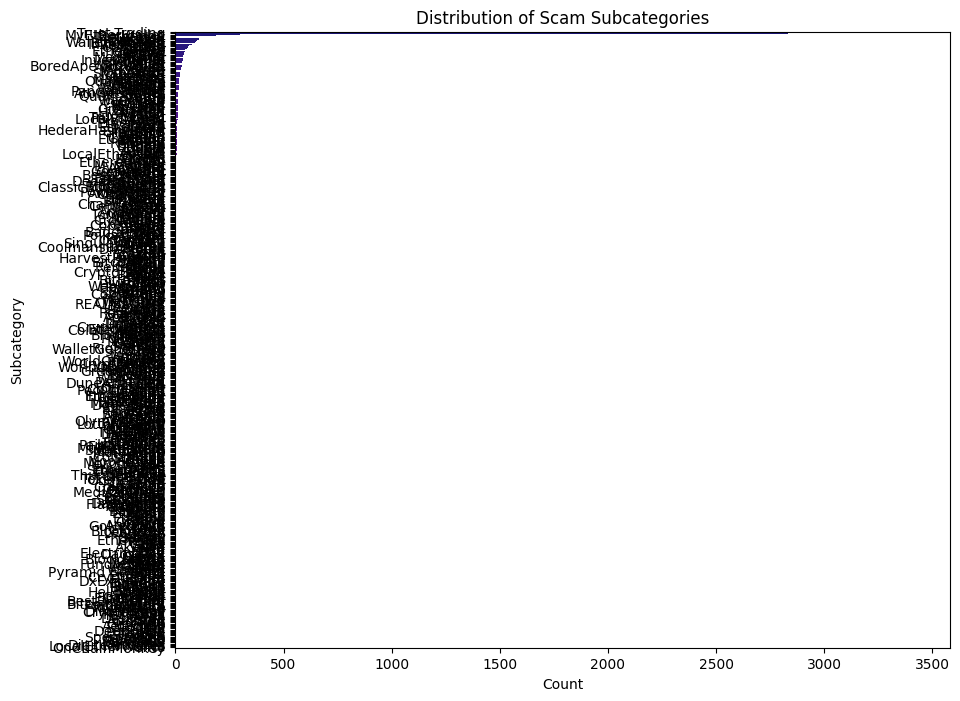


Reporting Sources:
reporter
CryptoScamDB    9880
Coinbase          23
Name: count, dtype: int64


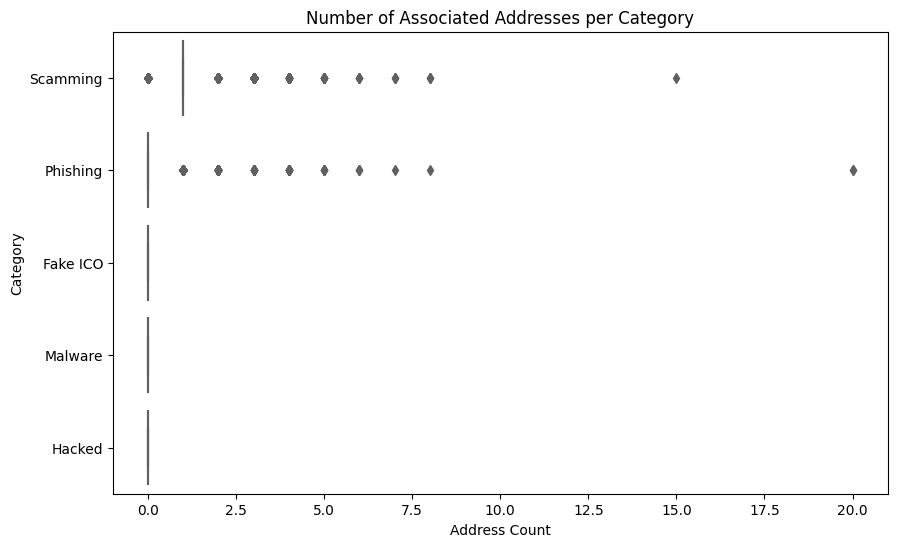

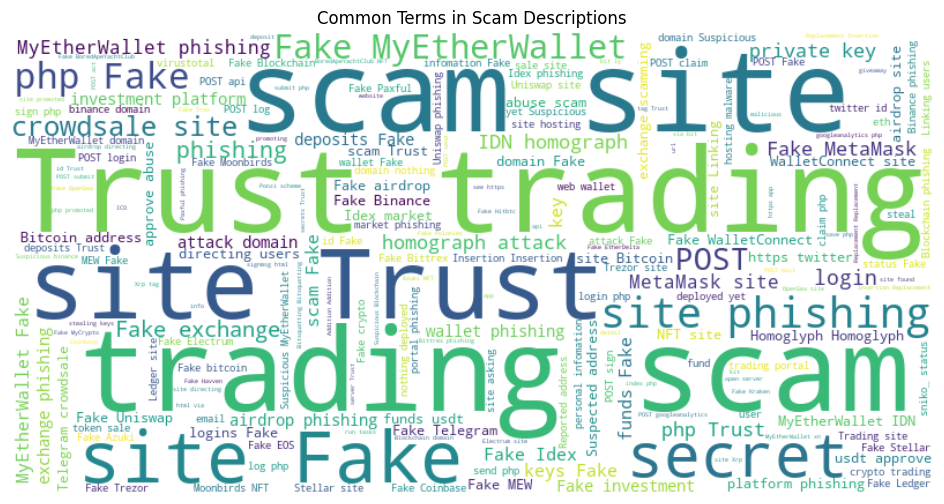


Summary Statistics for Address Count:
count    9906.000000
mean        0.591157
std         0.879068
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        20.000000
Name: address_count, dtype: float64


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
uris = pd.read_csv('/kaggle/input/cryptocurrency-scam-dataset/uris.csv')
urls = pd.read_csv('/kaggle/input/cryptocurrency-scam-dataset/urls.csv')

# Display the first few rows of each dataset
print("URIs Dataset:")
display(uris.head())

print("URLs Dataset:")
display(urls.head())

# Combine the datasets for a unified EDA (optional if columns match)
data = pd.concat([uris, urls], ignore_index=True)

# Check for missing values in each column
print("\nMissing Values:")
display(data.isnull().sum())

# Overview of categories
print("\nUnique Categories of Scams:")
print(data['category'].value_counts())

# Plot distribution of scam categories
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='category', order=data['category'].value_counts().index, palette='viridis')
plt.title("Distribution of Scam Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# Overview of subcategories
print("\nUnique Subcategories of Scams:")
print(data['subcategory'].value_counts())

# Plot distribution of scam subcategories
plt.figure(figsize=(10, 8))
sns.countplot(data=data, y='subcategory', order=data['subcategory'].value_counts().index, palette='plasma')
plt.title("Distribution of Scam Subcategories")
plt.xlabel("Count")
plt.ylabel("Subcategory")
plt.show()

# Analyze reporter data (if multiple sources exist)
print("\nReporting Sources:")
print(data['reporter'].value_counts())

# Plot addresses per category (if applicable)
address_count = data['addresses'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)
data['address_count'] = address_count
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='address_count', y='category', palette='coolwarm')
plt.title("Number of Associated Addresses per Category")
plt.xlabel("Address Count")
plt.ylabel("Category")
plt.show()

# Check for common terms in descriptions (simple word frequency analysis)
from collections import Counter
from wordcloud import WordCloud

description_text = ' '.join(data['description'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(description_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Terms in Scam Descriptions")
plt.show()

# Summary statistics
print("\nSummary Statistics for Address Count:")
print(data['address_count'].describe())


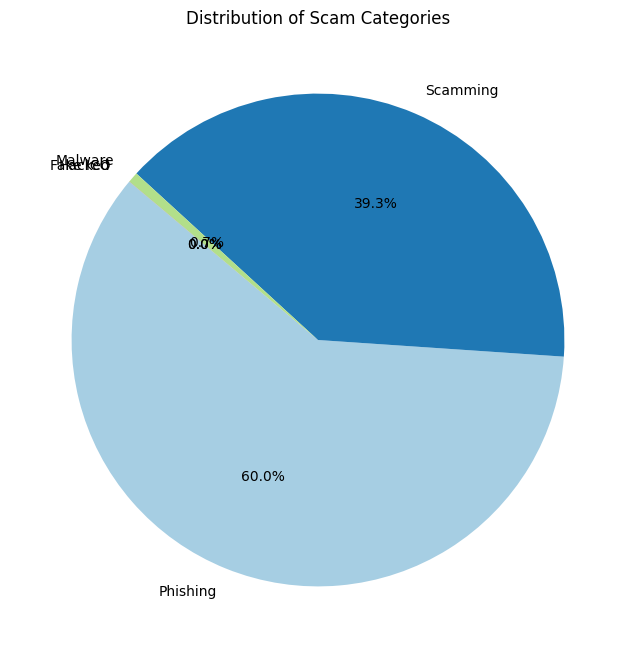

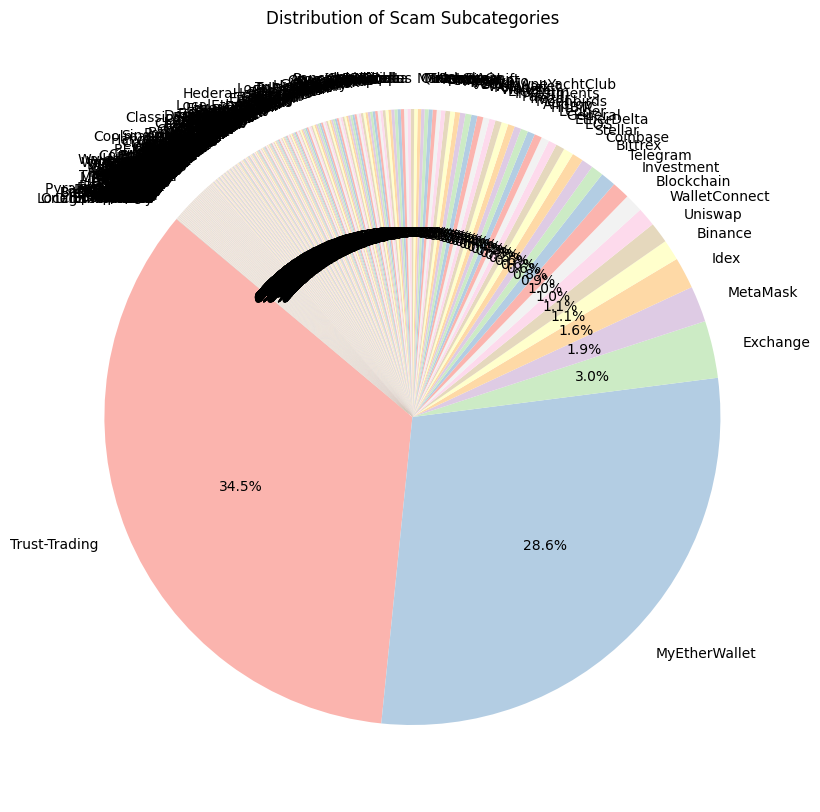

In [ ]:
import matplotlib.pyplot as plt

# Pie chart for scam categories
def plot_category_pie(data):
    category_counts = data['category'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title("Distribution of Scam Categories")
    plt.show()

# Pie chart for scam subcategories
def plot_subcategory_pie(data):
    subcategory_counts = data['subcategory'].value_counts()
    plt.figure(figsize=(10, 10))
    plt.pie(subcategory_counts, labels=subcategory_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
    plt.title("Distribution of Scam Subcategories")
    plt.show()

# Usage
# Assuming `data` is the combined dataset from uris and urls
plot_category_pie(data)
plot_subcategory_pie(data)


### Explanation
- **`plot_category_pie(data)`**: Generates a pie chart for the `category` column, showing the percentage distribution of scam types.
- **`plot_subcategory_pie(data)`**: Creates a pie chart for the `subcategory` column, providing a breakdown of specific scam tactics.
- **`colors=plt.cm.Paired.colors`** and `colors=plt.cm.Pastel1.colors`: Adds color variations for the charts.